Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3147 - loss: 1.8407 - val_accuracy: 0.5266 - val_loss: 1.3058
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5469 - loss: 1.2709 - val_accuracy: 0.5745 - val_loss: 1.1938
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6163 - loss: 1.0904 - val_accuracy: 0.6248 - val_loss: 1.0670
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6539 - loss: 0.9844 - val_accuracy: 0.6536 - val_loss: 0.9850
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6818 - loss: 0.9041 - val_accuracy: 0.6756 - val_loss: 0.9298
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7102 - loss: 0.8358 - val_accuracy: 0.6915 - val_loss: 0.8850
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7246 - loss: 0.7903 - val_accuracy: 0.7067 - val_loss: 0.8512
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7453 - loss: 0.7341 - val_accuracy: 0

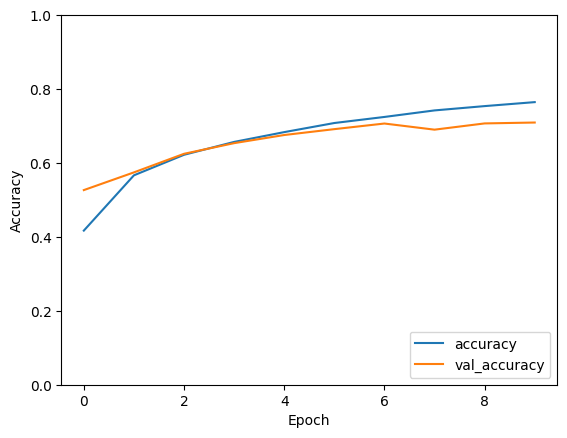

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Carregar o conjunto de dados CIFAR-10 para treinamento e teste
(train_images, train_labels), (test_images,
                               test_labels) = datasets.cifar10.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Esses nomes são os labels das classes no conjunto de dados CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apenas para checar se a ordem da lista class_names está correta
# plt.figure(figsize=(10, 10))
# for i in range(25):
#     # Plotar as primeiras 25 imagens do conjunto de treinamento
#     plt.subplot(5, 5, i + 1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     # Os rótulos CIFAR-10 são arrays, então precisamos do índice 0
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

# Construir o modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(
    filters=32,             # 32 filtros (mapas de características)
    kernel_size=(3, 3),     # cada filtro é 3x3
    activation='relu',
    input_shape=(32, 32, 3)  # imagens CIFAR-10 são 32x32 com 3 canais (RGB)
))
# reduz pela metade altura/largura
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Segunda camada convolucional + pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Terceira camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Camadas totalmente conectadas (Dense) para classificação
model.add(layers.Flatten())              # achata o tensor 3D em um vetor 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes do CIFAR-10

# Mostrar o resumo do modelo (shapes e número de parâmetros)
model.summary()

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # labels são inteiros 0–9
    metrics=['accuracy']
)

# Treinar o modelo
history = model.fit(
    train_images, train_labels,
    epochs=10,
    # 64 é mais rápido para treinar, mas 32 mostrou melhores resultados
    batch_size=64,
    # usa o conjunto de teste como validação simples
    validation_data=(test_images, test_labels)
)


# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


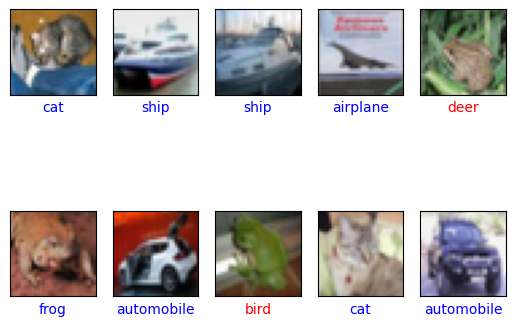

In [13]:
predictions = model.predict(test_images)
# Exibir a previsão para a primeira imagem de teste
# plotar a primeira imagem de teste
for i in range(10):
    # plotar imagens de teste
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i][0]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{}".format(class_names[predicted_label]), color=color)
plt.show()